# $\bullet\textbf{ CHAPTER 06 : ALGEBRA / THE SYMMETRIC GROUP $S_n$ }.$
#### $$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\bullet\textbf{ John Mars} .$$


In [38]:
from numpy import array, gcd, prod
from sympy import Matrix 
from pandas import DataFrame
from itertools import chain, permutations
from time import perf_counter


class S_n:
    
    def __init__(self,sigma): #input: sigma: list
        self.sigma = sigma
    
    def __repr__(self):
        return str(array([list(range(1,len(self.sigma)+1)),list(self.sigma)]))
    
    def __str__(self):
        return str(array([list(range(1,len(self.sigma)+1)),list(self.sigma)]))
    
    def view(self,latex=None):
        if latex in [False,0,'0','F','False','arr','numpy']:
            return array([list(range(1,len(self.sigma)+1)),list(self.sigma)])
        else:
            return Matrix(array([list(range(1,len(self.sigma)+1)),list(self.sigma)]))

    def mul2(self,obj,view=None): #mul for only 2 objects [s1,s2] : s1(s2).
        d1=dict(zip(list(range(1,len(obj[0])+1)),obj[0]))
        d2=dict(zip(list(range(1,len(obj[1])+1)),obj[1]))
        D ={i:j for i,j in zip(list(range(1,len(d1)+1)),[d1[d2[i]] for i in range(1,len(d1)+1)])}
        
        if view in [True,'arr','T','1',1,0,'list']:
            return [list(range(1,len(d1)+1)),list(D.values())][1]
        elif view == 'latex':
            return Matrix([list(range(1,len(d1)+1)),list(D.values())][1]).T
        elif view in ['array','arr','numpy','np']:
            return array([list(range(1,len(d1)+1)),list(D.values())][1])
        else:
            return S_n([list(range(1,len(d1)+1)),list(D.values())][1])
    def arr_mul2(self,obj):
        return self.mul2(obj,True)
        
    def power(self,n,Set=None):
        #dynamic programming:
        SIGMA = [self.sigma,self.arr_mul2([self.sigma,self.sigma])]
        for i in range(2,n):
            SIGMA.append(self.arr_mul2([self.sigma,SIGMA[-1]]))

        if n==0:
            SIGMA = [list(range(1,len(self.sigma)+1))]
        elif n==1:
            SIGMA = [self.sigma]
            
        if Set in ['True',True,1,'set',set,'all']:
            return SIGMA
        elif Set in [dict,'dict']:
            return dict(zip([f'sigma^{i}=' for i in range(1,n+1)],SIGMA))
        else:
            return SIGMA[-1]

    def inv(self,view=None):
        d = dict(zip(list(range(1,len(self.sigma)+1)),self.sigma))
        output = list(dict(zip(list(range(1,len(self.sigma)+1)),[d[x] for x in d.values()])).values())
        if view in [1,True,list,'True','list']:
            return output
        elif view in ['arr','numpy','np','array']:
            return array(output)
        else:
            return S_n(output)
        
    def ord_slow(self): #slow way
        k = 1
        while self.power(k) != list(range(1,len(self.sigma)+1)):
            k+=1
        return k
    def ord(self):
        return LCM(list_of_len(self.circle_factorization()))
    
    def power_fast(self,n,latex=None):
        if latex ==True:
            return Matrix(self.power(n%self.ord())).T
        else:
            return self.power(n%self.ord())
    def Next(self,L):
        MAX = len(self.sigma)
        Next = 0
        if L == sorted(L) and L[-1]!= MAX:
            Next = L[-1]+1
        if len(L)==1:
            Next = 2

        for i in range(1,len(L)+1):
            if i not in L:
                Next+=i
                break

        return Next
    
    def next_starting_point(self,sigm): # list of the "next starting point" in order to find the next circle
        List = [self.Next(f(sigm,1))]
        c=1
        while List[-1]!=0:
            List.append(self.Next(f(sigm,1) + List_oper(list(chain([f(sigm,List[i]) for i in range(0,c)])) )))
            c+=1
        List.pop()

        return [1]+ List
    
        
    def max_ord_S_n(self,n,data=None,color=None):
        out_lcm = list(map(LCM,decompose(n)))
        if data in [True,'df','pandas','True','data']:
            dec_map = list(map(list_to_sum,decompose(n)))
            return DataFrame(zip(dec_map,out_lcm),columns= [f'partition of {n}','ord'])
        else:
            return max(out_lcm)
        
    def max_ord_S_n_col(self,n):
        return self.max_ord_S_n(n,data=True).style.apply(highlight_max, subset=['ord'])
        
    def s_dict(self):
        return dict(zip(list(range(1,len(self.sigma)+1)),self.sigma))
    
    def circle_factorization(self,view=None):
        Circles = []

        for x in self.next_starting_point(self.sigma):
            Circles.append(f(self.sigma,x))
          
            
        if view == None:
            return list_oper2(Circles)
        elif view == 'full':
            return Circles
        elif view in ['latex',True,'factor','circles']:
            return list_oper3(list_oper2(Circles))
        
    def odd_even(self):
        if self.sigma == list(range(1,len(self.sigma)+1)):
            return 'even'
        return pmone_to_even_odd(prod(list_oper4(list_of_len(self.circle_factorization()))))
    
    def circle_factorization_2(self,view=None):
        if view == None:
            return list_oper6(list(map(list_oper7,self.circle_factorization())))
        elif view in [True,'arr','tuples']:
            return list(map(list_oper7,self.circle_factorization()))
    def is_odd(self):
        if self.odd_even() == 'odd':
            return True
        return False
    def is_even(self):
        if self.odd_even() == 'even':
            return True
        return False
        
    def A_n(self,n):
        return list(map(list,list(permutations(list(range(1,n+1))))))

            
def LCM(A):
    Lcm = A[0]
    for i in range(1,len(A)):
        Lcm = Lcm*A[i]//gcd(Lcm, A[i])
    return Lcm

D = { 1: [[1]] }
def decompose(n):
    try:
        return D[n]
    except:
        pass
    result = [[n]]
    for i in range(1,n):
        a = n-i
        R = decompose(i)
        for r in R:
            if r[0] <= a:
                result.append([a] + r)
    D[n] = result
    return result

def list_to_sum(L):
    if len(L)==1:
        return str(L[0])
    else:
        s = ''
        for i in range(len(str(L))):
            if str(L)[i] not in '[,]':
                s+=str(L)[i]
            elif str(L)[i]==',':
                s+=' +'
    return s

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightcoral' if v else '' for v in is_max]


def List_oper(L): #takes a list of lists and maps it in one list
    s_new = ''
    s = str(L)
    for x in s:
        if not x in '[]':
            s_new += x
    return list(map(int,s_new.split(',')))


def f(S,start): # finds the next circle if you start from 'start'
    s_dic = dict(zip(list(range(1,len(S)+1)),S)) 
    L = []
    L.append(start)
    while L.count(start)!=2:
        L.append(s_dic[L[-1]])
    L.pop()
    
    return L


def list_oper2(L):
    L_new = []
    for x in L:
        if not len(x)==1:
            L_new.append(x)
    return L_new

def list_oper3(L):
    s = ''
    for x in str(L):
        if x == '[':
            s += '('
        elif x == ']':
            s += ')'
        elif x != ',':
            s += x
    return s[1:-1]

def list_of_len(L): #L list of lists, returns the len of the list
    return list(map(len,L))


def list_oper4(L):
    pm_one = lambda n:-1 if n%2==0 else 1
    return list(map(pm_one,L))

pmone_to_even_odd = lambda n: 'odd' if n==-1 else 'even'


def list_oper5(L):
    return Matrix([list(range(1,len(L)+1)),L])

def list_oper6(L):
    s = ''
    l = str(L)
    for i,x in enumerate(l):
        if not x in "[],''":
            s += x
    return s
def list_oper7(L):
    s = ''
    N = [(L[i],L[i+1]) for i in range(len(L)-1)]
    for i,x in enumerate(N):
        s += str(N[i])
    s_new = ''
    for i in s:
        if i!=',':
            s_new += i
    return s_new
            
    
def A_n_sub_group(L,view=None): #subgroup of even ords
    A = []
    for i,x in enumerate(L):
        class_val = S_n(x)
        try:
            if class_val.odd_even() == 'even':
                A.append(x)
        except:
            pass
            
    if view in [None,True,'True','arr']:
        return A
    elif view in ['latex','set',set,'sympy']:
        return list(map(list_oper5,A))
    
    
    

In [39]:
#i.e
Sig = S_n([4,6,7,2,5,1,8,3])
Sig #view of sigma

[[1 2 3 4 5 6 7 8]
 [4 6 7 2 5 1 8 3]]

In [40]:
Sig.view()

Matrix([
[1, 2, 3, 4, 5, 6, 7, 8],
[4, 6, 7, 2, 5, 1, 8, 3]])

In [41]:
Sig.ord()

12

In [42]:
print(Sig.circle_factorization(view=True))

(1 4 2 6) (3 7 8)


In [43]:
print(Sig.circle_factorization_2())

(1 4)(4 2)(2 6) (3 7)(7 8)


In [44]:
print(*Sig.circle_factorization_2())

( 1   4 ) ( 4   2 ) ( 2   6 )   ( 3   7 ) ( 7   8 )


In [45]:
Sig.odd_even()

'odd'

In [46]:
Sig.is_even()

False

In [47]:
Sig.is_odd()

True

In [48]:
Sig.ord()

12

In [13]:
Sig.max_ord_S_n_col(8)

,partition of 8,ord
0,8,8
1,7 + 1,7
2,6 + 2,6
3,6 + 1 + 1,6
4,5 + 3,15
5,5 + 2 + 1,10
6,5 + 1 + 1 + 1,5
7,4 + 4,4
8,4 + 3 + 1,12
9,4 + 2 + 2,4


In [14]:
Sig.power(4,dict)

{'sigma^1=': [4, 6, 7, 2, 5, 1, 8, 3],
 'sigma^2=': [2, 1, 8, 6, 5, 4, 3, 7],
 'sigma^3=': [6, 4, 3, 1, 5, 2, 7, 8],
 'sigma^4=': [1, 2, 7, 4, 5, 6, 8, 3]}

In [15]:
Sig.power_fast(12,latex=True) # domain S8

Matrix([[1, 2, 3, 4, 5, 6, 7, 8]])

In [16]:
Sig.circle_factorization()

[[1, 4, 2, 6], [3, 7, 8]]

In [17]:
Sig.max_ord_S_n(n=7)

12

In [18]:
df = Sig.max_ord_S_n(n=7,data = True)
df

,partition of 7,ord
0,7,7
1,6 + 1,6
2,5 + 2,10
3,5 + 1 + 1,5
4,4 + 3,12
5,4 + 2 + 1,4
6,4 + 1 + 1 + 1,4
7,3 + 3 + 1,3
8,3 + 2 + 2,6
9,3 + 2 + 1 + 1,6


In [19]:
Sig.max_ord_S_n_col(6) #max highlighted

,partition of 6,ord
0,6,6
1,5 + 1,5
2,4 + 2,4
3,4 + 1 + 1,4
4,3 + 3,3
5,3 + 2 + 1,6
6,3 + 1 + 1 + 1,3
7,2 + 2 + 2,2
8,2 + 2 + 1 + 1,2
9,2 + 1 + 1 + 1 + 1,2


In [20]:
Sig.max_ord_S_n(n=16)

140

In [21]:
Sig.max_ord_S_n(n=16,data='df')

,partition of 16,ord
0,16,16
1,15 + 1,15
2,14 + 2,14
3,14 + 1 + 1,14
4,13 + 3,39
...,...,...
226,2 + 2 + 2 + 2 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1,2
227,2 + 2 + 2 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1,2
228,2 + 2 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 ...,2
229,2 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 ...,2


In [22]:
Sig.max_ord_S_n_col(n=11)

,partition of 11,ord
0,11,11
1,10 + 1,10
2,9 + 2,18
3,9 + 1 + 1,9
4,8 + 3,24
5,8 + 2 + 1,8
6,8 + 1 + 1 + 1,8
7,7 + 4,28
8,7 + 3 + 1,21
9,7 + 2 + 2,14


In [23]:
Sig.max_ord_S_n(n=22)

420

In [24]:
Sig.max_ord_S_n(n=22,data='df')

,partition of 22,ord
0,22,22
1,21 + 1,21
2,20 + 2,20
3,20 + 1 + 1,20
4,19 + 3,57
...,...,...
997,2 + 2 + 2 + 2 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 ...,2
998,2 + 2 + 2 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 ...,2
999,2 + 2 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 ...,2
1000,2 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 + 1 ...,2


In [25]:
Sig.max_ord_S_n(n=30)

4620

In [26]:
#Sig.max_ord_S_n(n=60)

In [27]:
Sig.inv()

[[1 2 3 4 5 6 7 8]
 [2 1 8 6 5 4 3 7]]

In [28]:
t0 = perf_counter()
s_to_n1 = Sig.power(500000)
t1 = perf_counter()
Time = t1-t0
Time

5.402605218999998

In [29]:
t3 = perf_counter()
s_to_n2 = Sig.power_fast(500000)
t4 = perf_counter()
Time = t4-t3
Time

0.000392088999998208

In [30]:
s_to_n1 == s_to_n2

True

In [31]:
Sig.mul2([[2,3,1],[1,3,2]], 
         view = True)

[2, 1, 3]

In [32]:
Sig.mul2([[2,3,1],[1,3,2]],'latex')

Matrix([[2, 1, 3]])

In [33]:
A_n_sub_group(Sig.A_n(3))


[[1, 2, 3], [2, 3, 1], [3, 1, 2]]

In [34]:
A_n_sub_group(Sig.A_n(3),view = 'latex')[0] # is in A_3


Matrix([
[1, 2, 3],
[1, 2, 3]])

In [35]:
A_n_sub_group(Sig.A_n(3),view = 'latex')[1] #is in A_3


Matrix([
[1, 2, 3],
[2, 3, 1]])

In [36]:
A_n_sub_group(Sig.A_n(3),view = 'latex')[2] #is in A_3


Matrix([
[1, 2, 3],
[3, 1, 2]])

$$\text{Cayley table of the symmetric $\textbf{group } S_3$}: $$


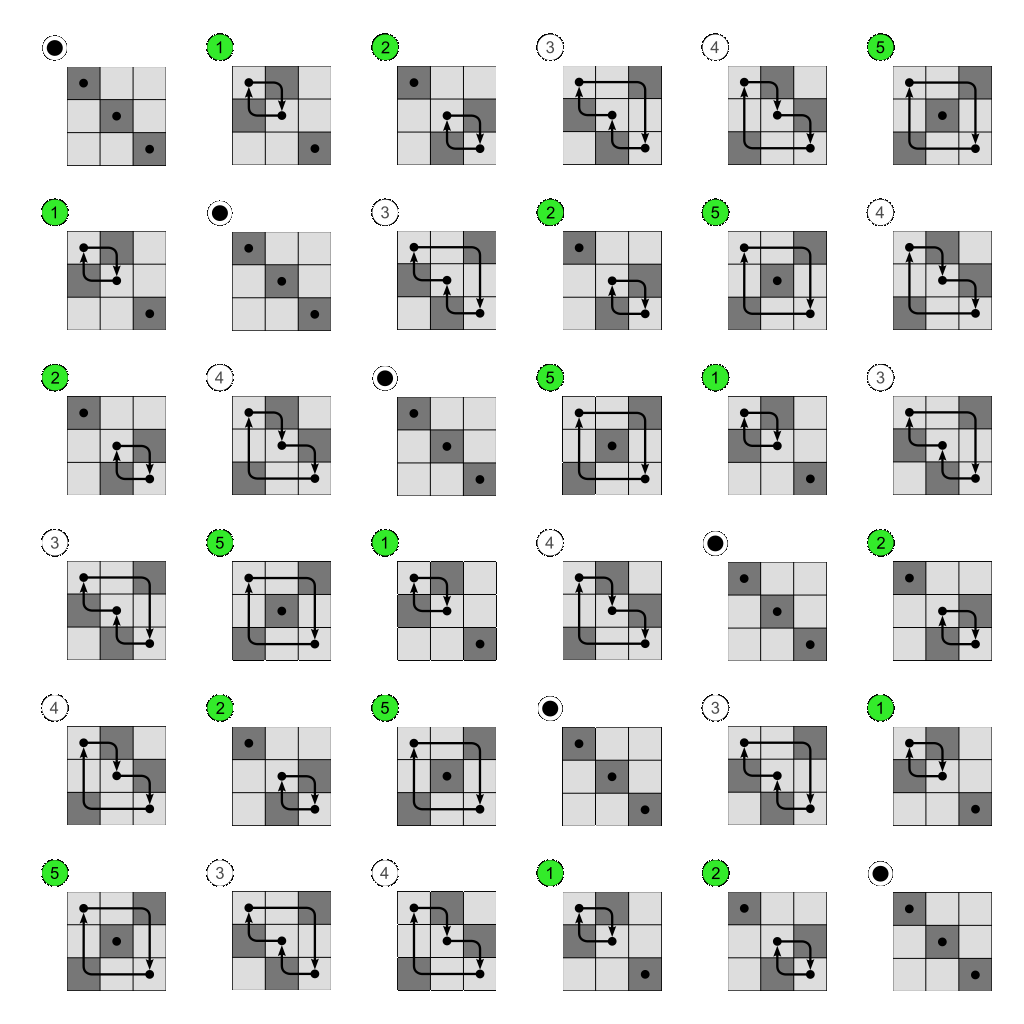

$$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\color{pink}{\bullet\text{ Ioannis Maris .}}$$